In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/fenglinglwb/MAT.git 

In [ ]:
%cd /content/MAT
!mkdir images
!mkdir masks
!pip install -r requirements.txt

In [ ]:
video_path = '/content/masked_video.mp4'
images_path = '/content/MAT/images'
mask_path = '/content/MAT/masks'

In [ ]:
def video_extracting(video_path, out_path):
    images = []
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
      images.append(image)
      cv2.imwrite(os.path.join(out_path, f'frame{count}.jpg'), image)       
      success, image = vidcap.read()
      count += 1

    return images

images = video_extracting(video_path, images_path)

In [ ]:
# Создаем маску
points = np.array([
    [1300, 60], [835, 328], [660, 1050], [1444, 1020], [1670, 1077], 
    [1740, 945], [945, 670], [1085, 510], [1600, 500]]
)

mask = np.full(images[0].shape[:2], fill_value=255.0)
cv2.fillPoly(mask, pts=[points], color=(0,0,0));

In [ ]:
# crop resize
img_size = (512, 512)
x1, x2, y1, y2 = 600, 1500, 20, 850

mask = cv2.resize(mask[y1:y2, x1:x2], img_size, interpolation=cv2.INTER_AREA)
img_crop_res = images[0][y1:y2, x1:x2].shape[:2]

for i in range(len(images)):
    image = cv2.resize(images[i][y1:y2, x1:x2], img_size, interpolation=cv2.INTER_AREA)
    cv2.imwrite(os.path.join(images_path, f'frame{i}.jpg'), image) 
    cv2.imwrite(os.path.join(mask_path, f'mask{i}.jpg'), mask)

# MAT inpainting

In [ ]:
%cd /content/MAT
!python generate_image.py --network FFHQ_512.pkl --dpath images --mpath masks --outdir /content/MAT_images

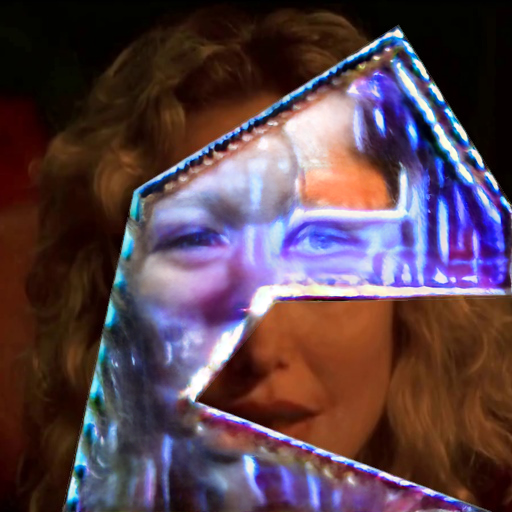

In [ ]:
cv2_imshow(cv2.imread('/content/MAT_images/frame10.png'))

In [ ]:
# Вставим полученное изображение в исходное
for i in range(len(images)): 
    img = cv2.resize(
        cv2.imread(f'/content/MAT_images/frame{i}.png'), 
        img_crop_res[::-1], 
        interpolation=cv2.INTER_AREA
    )
    images[i][y1:y2, x1:x2] = img
    cv2.imwrite(f'/content/MAT_images/frame{i}.png', images[i])

In [ ]:
# Запись видео
frameSize = (1920, 1080) 
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 26.0, frameSize) 
for image in images: 
    out.write(image)

#SimSwap

In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio===0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install insightface==0.2.1 moviepy onnxruntime-gpu==1.9.0

In [ ]:
%cd /content
!git clone https://github.com/neuralchen/SimSwap.git

!mkdir /content/SimSwap/parsing_model/checkpoint
%cd /content/SimSwap/parsing_model/checkpoint
!gdown 154JgKpzCPW82qINcVieuPH3fZ2e0P812

%cd /content/SimSwap/insightface_func/
!gdown 1PGnP_yBiGv5lL-6wj_M-0ykES0WUvvz_
!unzip antelope.zip -d models

!mkdir /content/SimSwap/arcface_model
%cd /content/SimSwap/arcface_model 
!gdown 1TLNdIufzwesDbyr_nVTR7Zrx9oRHLM_N

%cd /content/SimSwap
!gdown 1PXkRiBUYbu1xWpQyDEJvGKeqqUFthJcI
!unzip checkpoints.zip -d checkpoints

In [ ]:
%cd /content/SimSwap
!python test_video_swapsingle.py --crop_size 224 --use_mask --name people --Arc_path arcface_model/arcface_checkpoint.tar --pic_a_path ./demo_file/joly.jpg --video_path /content/output_video.mp4 --output_path ./output/multi_test_swapsingle.mp4 --temp_path ./temp_results 

/content/SimSwap
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5220:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4732:(_snd_config_evaluate) function snd_func_concat 